# **Task D1** (Due May 8, 11 AM)
## Analyzing YouTube Video Data from News Publishers

##### This task focuses on analyzing YouTube videos about a news topic (e.g., Covid-19) published by at least 4 English news publishers (e.g., BBC, Fox News, ...) from a start date to an end date. You will need to specify the news topic and the list of keywords to search for the videos about that topic on YouTube. Also, you will need to extract the channel IDs of the news publishers using the function get_channel_info() given to you in the attached "collect.ipynb" file. All settings need to be specified in Section B (Settings) of "collect.ipynb" and also copied into Section B (Settings) of this jupyter notebook (D1.ipynb). Please note the terms "News Publisher" and "Channel" have been used interchangeably in this task (each news publisher has a channel - if a news publisher has more than one channels on YouTube, pick any and state that in your TaskCompletionReport). The following instructions convey important information about the task. Please **read them carefully** and complete the task. If you need any clarification please    
<img src="youtube.png" alt="SIT112 Avocado!" width="1800" height="200">

### A. Instructions
#### Attachments
* directions.pdf
* collect.ipynb
* credentials-sample.ini
* video-presentation-guideline.pdf

#### Get Started 
1. Rename the "credentials-sample.ini" file to "credentials.ini" and follow the instructions. 
2. Creat your YouTube API key and assign it to developer_key in the credentials.ini file. You will need the YouTube API key to get access to the YouTube API (collect the data). See the following video: https://youtu.be/N18czV5tj5o (the video is not up to date; the instrucitons might be sighly different. You can view the following link for more details: https://developers.google.com/youtube/v3/getting-started). Please note Projects that enable the YouTube Data API have a default quota allocation of 10,000 units per day; to make an efficient use of your quota, please avoid multiple excecutions of the "collect.ipynb" file: https://developers.google.com/youtube/v3/guides/quota_and_compliance_audits. 
3. To work with the YouTube API (send queries), you need to install Google API Python Client using: "conda install google-api-python-client" 
#### Specify the news topic and news publishers (channels)
4. Choose a news topic (e.g., Covid-19) and a list of keywords to be used for finding videos about that topic. You can extract the keywords by looking at some sample video titles. 
5. Choose at least 4 popular English news publishers (e.g., BBC, Fox News).
6. Extract, manually, the video IDs of sample videos from different  news publishers (channels). You can do so by clicking on the share button for each video. 
7. Extract the Channel IDs of the videos using the get_channel_info() function in collect.ipynb 
#### Collect the Videos and Comments using "collect.ipynb" 
8. Specify the Channel IDs and names in the Settings section of the attached "collect.ipynb" file (CHANNELS = {...})
9. Specify the list keywords in the Settings section of the attached collect.ipynb file (KEYWORDS = [...])
10. Specify the START_DATE and END_DATE in the Settings section of the attached collect.ipynb file
11. Specify the MAX_VIDEOS such that you can extract **at least 20 videos per news publisher (channel)**. Make sure for your specified topic, **at least 300 comments per news publisher (channel)** can be collected. Please note some publishers might have disabled comments.
12. Please **do not make any changes to the "collect.ipynb" file**
13. Execute the collect.ipynb file to collect the videos (will be stored in videos.csv) and the comments on those videos (will be stored in comments.csv).
#### Complete the Task
14. <font color='red'> Choose only 2 quesitons from Section E1 and only 2 quesitons from Section E2 </font> and answer them based on the hints. Please note, for each question, you must **briefly discuss your observations** based on the results.
15. Please note **there is no unique solution** for most questions; if you need to make any assumptions, **state your assumptions** in the comments and in your TaskCompletionReport and answer the question accordingly. Please also note, **if something has not been clearly stated in a question (e.g., the type of visualization, etc) it means you are allowed to make your own choice**. 
16. **Read the attached "video-presentation-guideline.pdf"** carefully and record a video clip (based on video-presentation-guideline.pdf) that presents your completed task. Upload the video on a video repository such as YouTube (or any other preferred repository) and provide the link in the TaskCompletionReport. 
17. Complete the TaskCompletionReport form.

#### Submit the Task
18. Please make sure you have copied the settings from collect.ipynb into your solution file (D1.ipynb), under section B (settings).  
19. Please make sure you have executed and saved all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
20. Please make sure you have included the link to the dataset(s) in your TaskCompletionReport.
21. Please make sure you have included the link to the video recording of your presentation in your TaskCompletionReport. 
22. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution file (D1.ipynb) as an "ipynb" file (do not zip/combine them). Please do not include "collect.ipynb" in your submission. 

Good luck :)

### B. Settings
Copy your settings from Section B of the "collect.ipynb" file below. 

In [2]:
VIDEOS_FILE = "videos.csv"
COMMENTS_FILE = "comments.csv"
CREDENTIALS_FILE = 'credentials.ini'
START_DATE = datetime(2020, 1, 1)
END_DATE = datetime(2023, 1, 1)
KEYWORDS =['coronavirus', 'covid', 'covid-19', 'pandemic']
# You can use functin get_channel_info() to extract the channel ID of a sample video from a news publisher ...
CHANNELS = {
    'UCXIJgqnII2ZOINSWNOGFThA' : 'Fox News',
    'UC16niRr50-MSBwiO3YDb3RA' : 'BBC News',
    'UCupvZG-5ko_eiXAupbDfxWw' : 'CNN',
    'UCaXkIU1QidjPwiAYu6GcHjg' : 'MSNBC'
}
MAX_VIDEOS = 50 # the maximum number of video that should be returned for each request. Acceptable values are 0 to 50
QUERY= f"intitle:{','.join(KEYWORDS)}"

### C. Imports
You need to import the following libraries. Install the libraries using "conda install ... or pip install ..." if they have not been installed on your machine. For example you can install google api python client by executing "conda install google-api-python-client"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from datetime import datetime
import os
from configparser import ConfigParser
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from langdetect import detect
import langdetect
from textblob import TextBlob
import calendar
import nltk
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.api.types import CategoricalDtype
from prettytable import PrettyTable
from nltk.stem import WordNetLemmatizer
from tabulate import tabulate
import numpy as np
from collections import defaultdict
import warnings
import pandas as pd
from collections import defaultdict
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to /home/iflal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### D. Clean and Prepare the Data

##### D.1. Write Python code that cleans the data for analyzing the videos and comments.

In [3]:
# a basic data cleaning has been performed on the collected data by the clean_data()function in collect.ipynb
def clean_data(VIDEOS_FILE, COMMENTS_FILE, stopwords):
    # Load videos data
    videos = pd.read_csv(VIDEOS_FILE)

    # Clean videos data
    videos['video_title'] = videos['video_title'].apply(lambda x: re.sub(r'[^\w\s]', '', x) if isinstance(x, str) else x) # remove punctuation
    videos['video_title'] = videos['video_title'].apply(lambda x: re.sub(r'\d+', '', x) if isinstance(x, str) else x) # remove digits
    videos['video_title'] = videos['video_title'].apply(lambda x: x.lower() if isinstance(x, str) else x) # convert to lowercase

    # Save cleaned videos data to new CSV file, replacing the existing file
    videos.to_csv(VIDEOS_FILE, index=False)

    # Load comments data
    comments = pd.read_csv(COMMENTS_FILE)

    # Clean comments data
    comments['comment_text'] = comments['comment_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x) if isinstance(x, str) else x)  # remove punctuation
    comments['comment_text'] = comments['comment_text'].apply(lambda x: re.sub(r'\d+', '', x) if isinstance(x, str) else x)  # remove digits
    comments['comment_text'] = comments['comment_text'].apply(lambda x: x.lower() if isinstance(x, str) else x)  # convert to lowercase

    # Remove duplicates
    comments = comments.drop_duplicates()

    # Remove rows with missing comment_text
    comments = comments.dropna(subset=['comment_text'])

    # Filter out comments that are not in English
    try:
        comments = comments[comments['comment_text'].apply(lambda x: langdetect.detect(x) == 'en')]
    except langdetect.LangDetectException as e:
        print(f"non-english comment skipped ... {e}")
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    comments['comment_text'] = comments['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # Save cleaned comments data to new CSV file, replacing the existing file
    comments.to_csv(COMMENTS_FILE, index=False)
# additionl data cleaning can be added here - if needed  

##### D.2. Write Python code that prepares the data for analyzing the videos and comments.

In [4]:
# A sample code for data preparation has been given below. Feel free to edit when needed

# Load the videos and comments dataframes from their respective CSV files
videos_df = pd.read_csv('videos.csv')
comments_df = pd.read_csv('comments.csv')

# Convert the published_at column to a datetime object for videos_df
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
videos_df['published_at_week'] = videos_df['published_at'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
videos_df['published_at_month'] = videos_df['published_at'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
videos_df['published_at_year'] = videos_df['published_at'].dt.strftime('%Y')

# Convert the published_at column to a datetime object for comments_df
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
comments_df['comment_date_week'] = comments_df['comment_date'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
comments_df['comment_date_month'] = comments_df['comment_date'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
comments_df['comment_date_year'] = comments_df['comment_date'].dt.strftime('%Y')

# Convert the duration column to seconds for videos_df
videos_df['duration'] = videos_df['duration'].apply(lambda x: re.findall(r'PT(\d+)M(\d+)S', x))
videos_df['duration'] = videos_df['duration'].apply(lambda x: int(x[0][0]) * 60 + int(x[0][1]) if len(x) > 0 else 0)

# Prepared DataFrame objects; can be used for data analysis
videos = videos_df
comments = comments_df
videos_comments_inner = pd.merge(videos,comments, on='video_id', how = 'inner') # merged videos and comments
videos_comments_left = pd.merge(videos,comments, on='video_id', how = 'left') # left-merged videos and comments

In [5]:
# additionl data cleaning can be added here - if needed 
#video.csv file
videos_df['video_id'] = videos_df['video_id'].astype('string')
videos_df['channel_id'] = videos_df['channel_id'].astype('string') 
videos_df['video_title'] = videos_df['video_title'].astype('string')
videos_df['channel_title'] = videos_df['channel_title'].astype('string')
videos_df['category_name'] = videos_df['category_name'].astype('string')
videos_df['live_upcoming_none'] = videos_df['live_upcoming_none'].astype('string')
videos_df['view_count'] = videos_df['view_count'].astype(int)
videos_df['like_count'] = videos_df['like_count'].astype(int)  
videos_df['dislike_count'] = videos_df['dislike_count'].astype(int)
videos_df['comment_count'] = videos_df['comment_count'].astype(int)
videos_df['published_at'] = videos_df['published_at'].astype('datetime64[ns]')
videos_df['tags'] = videos_df['tags'].astype('string')
videos_df['definition'] = videos_df['definition'].astype('string')
videos_df['caption'] = videos_df['caption'].astype(bool)
videos_df.to_csv('videos.csv', index=False)

#comments.csv file
comments_df['video_id'] = comments_df['video_id'].astype('string')
comments_df['comment_id'] = comments_df['comment_id'].astype('string')  
comments_df['comment_text'] = comments_df['comment_text'].astype('string')
comments_df['comment_author'] = comments_df['comment_author'].astype('string')
comments_df['comment_author'] = comments_df['comment_author'].astype('string')
comments_df.to_csv('comments.csv', index=False)

In [7]:
comments_df.info()
videos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464 entries, 0 to 4463
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   video_id            4464 non-null   string        
 1   comment_id          4464 non-null   string        
 2   comment_text        4407 non-null   string        
 3   comment_author      4463 non-null   string        
 4   comment_date        4462 non-null   datetime64[ns]
 5   comment_like_count  4462 non-null   float64       
 6   parent_comment_id   523 non-null    object        
 7   comment_date_week   4462 non-null   object        
 8   comment_date_month  4462 non-null   object        
 9   comment_date_year   4462 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4), string(4)
memory usage: 348.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Nul

### E. Analyze the Videos and Comments

Please note you must **discuss your observations** for each question, in addition to the python code. 

#### E.1. Analyze the Videos and Comments - Part 1
* Choose **(only) 2** of the following questions (E.1.1 to E.1.7) and write Python code to answer them. 

##### E.1.1 Compare the distributions of the number of views, likes, and comments for the videos. Use visualization and discuss your observations. Your visualization must include three subplots, one for each variable (number of views, number of likes, number of comments), and each subplot must display a histogram of the respective variable overlayed by a kernel density function. Additionally, your visualization must have proper labels for the x and y axes, as well as a title for each subplot.

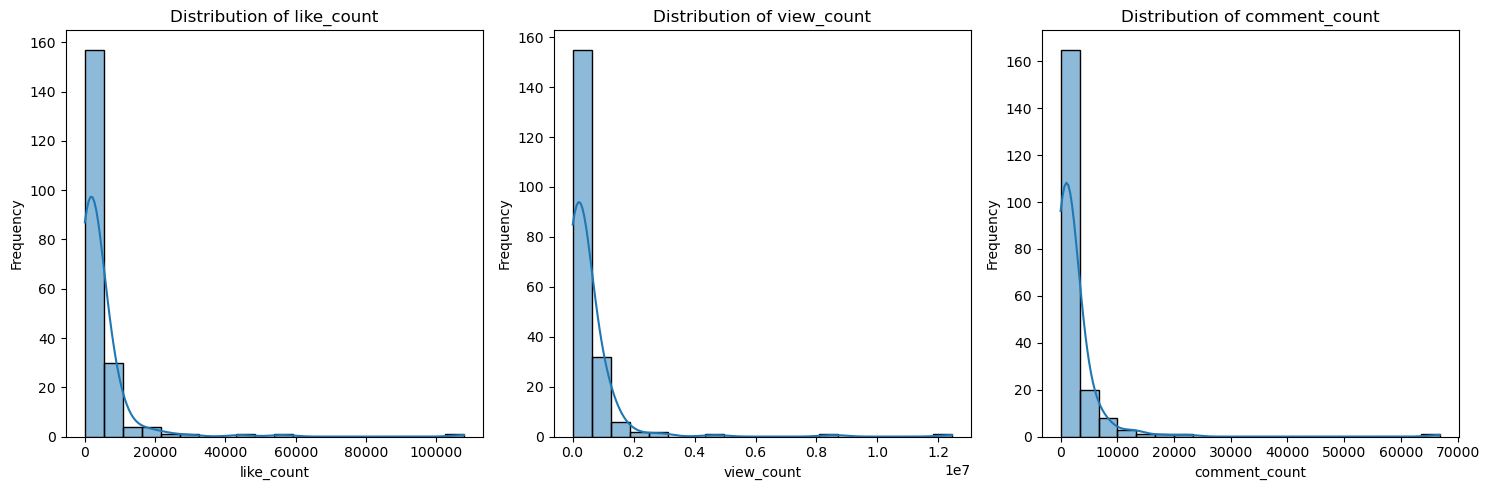

In [8]:
# Load the data (replace with your actual data loading method)
data = pd.read_csv("videos.csv")

# Define the column names
columns_to_plot = ["like_count", "view_count", "comment_count"]

# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop over the columns and plot histograms with KDE overlays
for i, col in enumerate(columns_to_plot):
    ax = axes[i]

    # Plot the histogram with KDE overlay
    sns.histplot(data[col], bins=20, kde=True, edgecolor="black", ax=ax)

    # Customize the plot
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Distribution of {col}")

# Adjust layout and display
plt.tight_layout()
plt.show()

##### E.1.2. What is the total number of views, likes, and comments for the videos published by different news publishers (channels)? Use visualization to compare these totals across the channels; discuss your observations. Your visualization should include three subplots, one for each variable (total number of views, total number of likes, and total number of comments). Additionally, your visualization should have appropriate labels for the x and y axes, as well as a title for each subplot.

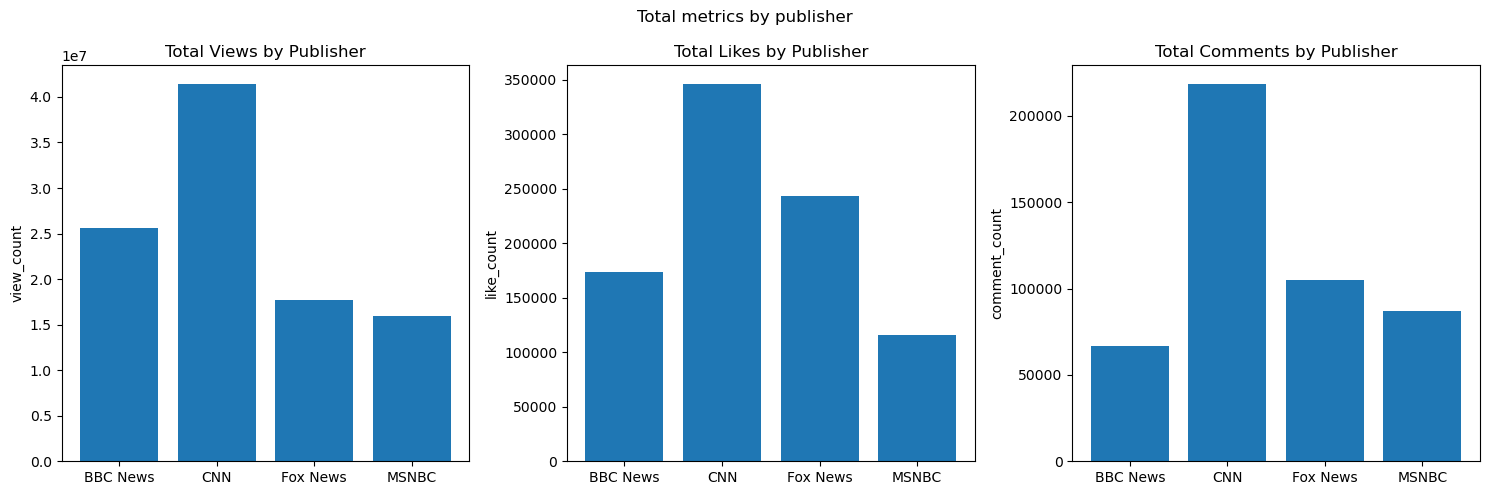

In [9]:
# Write your code here:

# Calculate total views, likes, and comments by publisher
totals = videos_df.groupby('channel_title')[['view_count', 'like_count', 'comment_count']].sum() 

# Create subplots
fig, axes = plt.subplots(1,3,figsize=(15,5))

# Plot total number of views, likes, and comments by publisher
# Plot views
axes[0].bar(totals.index, totals['view_count'])
axes[0].set_title('Total Views by Publisher')
axes[0].set_ylabel('view_count')

# Plot likes  
axes[1].bar(totals.index, totals['like_count'])
axes[1].set_title('Total Likes by Publisher')  
axes[1].set_ylabel('like_count')

# Plot comments
axes[2].bar(totals.index, totals['comment_count'])
axes[2].set_title('Total Comments by Publisher')
axes[2].set_ylabel('comment_count')

# Customize and display the plot
fig.suptitle('Total metrics by publisher')
fig.tight_layout()

# Show
plt.show()

##### E.1.3. How has the number of comments changed over time? Use visualization to answer this question and annotate at least three major events related to Covid-19 (e.g., WHO declares pandemic) on your plot. Additionally, analyze the plot and try to identify any relationship between these events and the changes in the number of comments; discuss your observations.

In [7]:
# Write your code here:

# Create a figure and an axes object 

# Group the comments by week 

# Plot comments_by_week 

# Annonate the major events on the plot ..

# Customize and display the plot

##### E.1.4. How are the parent comments' likes distributed across different news publishers (channels)? Visualize the distributions using a violin plot and discuss your observations.

* A violin plot is a type of data visualization that combines the features of a box plot and a kernel density plot. It is used to show the distribution of a dataset, and provides information about the underlying data. The thickness of a violin plot represents the density of data points in that area of the plot. Thicker areas indicate a higher density of data points, while thinner areas indicate a lower density of data points. 

In [8]:
# Write your code here:

# Assign the `videos_comments` DataFrame to a new variable `df`

# Create a new column in the `df` DataFrame to indicate whether a comment is a parent or not

# Filter out non-parent comments using a boolean mask created from the `is_parent` column

# Create a violin plot of the data with a limited y-axis range

# Customize and display the plot

##### E.1.5. How are the comment replies distributed over time for different news publishers (channels)? Visualize the distributions using probability density functions.

In [9]:
# Write your code here:

# Group the comments by channel title

# Create a figure and axis object using the `subplots()` method 

# Loop through the channels and plot the probability density function for each

# Customize and display the plot

##### E.1.6. What are the top 5 videos with the highest ratio of likes to views? Display the URLs of these videos as well as their corresponding like counts, view counts, and like to view ratios. Discuss your observations. 

In [10]:
# Write your code here:

# Calculate the ratio of likes to views for each video

# Sort the videos by like to view ratio in descending order 

# Select the top 5 videos with the highest like ratio

# Display the URLs, like and view counts, and like to view ratios for the top 5 videos

##### E.1.7. Is there any relationship between the average length of the comments on a video and its like count? Visualize the relationship and discuss your observations. Exclude from your analysis the videos with no comments.

In [11]:
# Write your code here:

# Calculate the average comment length and like count for each video 

# Plot the relationship between average comment length and like count

# Customize and display the plot

#### E.2. Analyze the Videos and Comments - Part 2
* Choose **(only) 2** of the following questions (E.2.1 to E.2.7) and write Python code to answer them. 

##### E.2.1. What are the top 10 comments with the most replies? For each comment, display the Channel Title, Comment text, and the total number of replies that comment has received. Discuss your observations.

In [10]:
# Get the total number of replies to each comment 
comments_df['reply_count'] = comments_df['parent_comment_id'].isnull().sum()

# Select root comments
root_comments = comments_df[comments_df['parent_comment_id'].isnull()]

# Join with videos dataframe to get channel title
root_comments = root_comments.join(videos_df.set_index('video_id'), on='video_id')

# Get top 10 root comments by reply count  
top10 = root_comments.sort_values('reply_count', ascending=False)[:10]  

# Display results
for index, row in top10.iterrows():
  print(f"Comment: {row['comment_text']}")
  print(f"Channel: {row['channel_title']}")
  print(f"Replies: {row['reply_count']}")
  print('')

Comment: covid august super unpleasant got vaccines booster last year got mild strain covid still felt miserable even though mild strain virus flu cold symptoms
Channel: Fox News
Replies: 3941

Comment: god bless india india get stronger ever
Channel: CNN
Replies: 3941

Comment: modi responsible helping state party power people didnt voted blocking help
Channel: CNN
Replies: 3941

Comment: already impossible us contain chinas economic development united states chose contain chinas economic development totally wrong stupid chinas rise inevitable china largest economy years years latest time united states second largest economy world us curbed indias economic development another years indias total economy would surpassed us india would become second largest economy world us would become third largest economy world united states largest economy second largest economy many countries still listen united states united states second largest economy third largest economy many countries listen 

##### E.2.2. How does the average length of the comments (in characters) on a video vary with its duration? Analyze this for different news publishers (channels) using visualizations and discuss your observations.

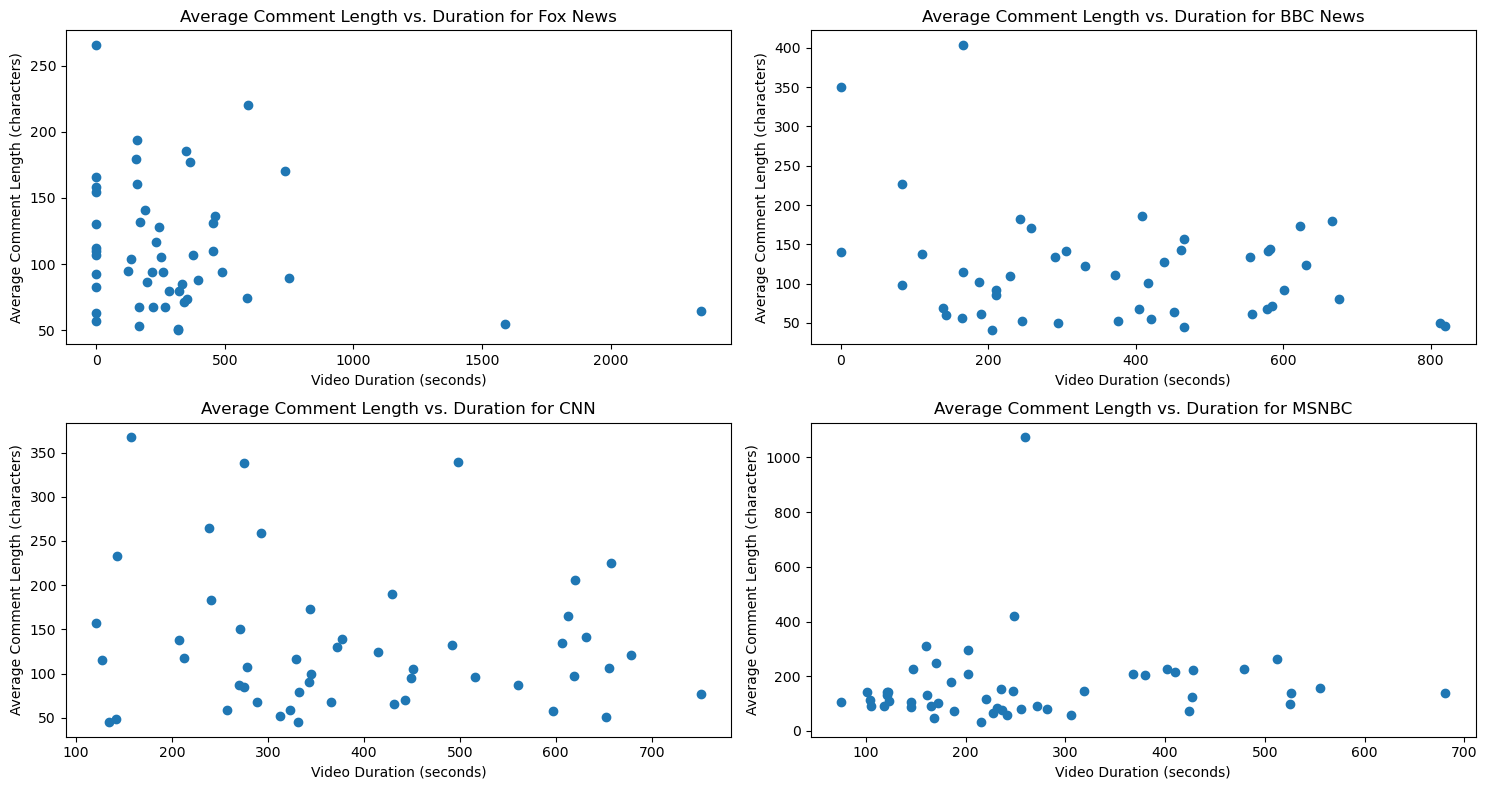

In [11]:
# Write your code here:

# Create a new DataFrame containing only the comments data
comments_data = pd.read_csv("comments.csv")
videos_data = pd.read_csv("videos.csv")

# Add a new column to the DataFrame to store the length of each comment
comments_data["comment_length"] = comments_data["comment_text"].str.len()

# Group the comments DataFrame by video_id and calculate the mean comment length for each video
comments_by_video = comments_data.groupby("video_id")["comment_length"].mean()

# Merge the videos DataFrame with grouped comments DataFrame
merged_data = videos_data.merge(comments_by_video, on="video_id", how="left")

# Create subplots for each channel
publishers = merged_data["channel_title"].unique()
nrows = int(len(publishers) / 2) + len(publishers) % 2
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, nrows * 4))

# Customize and display the subplots
for i, publisher in enumerate(publishers):
    ax = axes.flat[i]
    data_for_publisher = merged_data[merged_data["channel_title"] == publisher]
    ax.scatter((data_for_publisher["duration"]), data_for_publisher["comment_length"])
    ax.set_xlabel("Video Duration (seconds)")
    ax.set_ylabel("Average Comment Length (characters)")
    ax.set_title(f"Average Comment Length vs. Duration for {publisher}")

plt.tight_layout()
plt.show()

##### E.2.3. How has the total number of comments per news publisher (channel) changed over months? Create a visualization to investigate this and discuss your observations. Make sure the outliers have been removed. 

In [14]:
# Write your code here:

# Convert the published_at column to a datetime object and extract year and month

# Calculate the total number of comments per channel_title and year_month

# Remove outliers

# Create a pivot table to group the data by year_month and channel_title

# Create, customize, and display the plot

##### E.2.4. How does the distribution of number of comments and likes vary across different news publishers (channels)? Use visualization to answer this question; discuss your observations. Make sure the outliers have been removed from the visualization. 

In [15]:
# Write your code here:

# Remove outliers

# Create a figure with two subplots

# Plot the distribution of comments and likes per news publisher

# Customize and display the plots

##### E.2.5. Is there a relationship between the duration of a video and receiving a below-average number of comments? Use visualization to answer this question; discuss your observations.

In [16]:
# Write your code here:

# Calculate average number of comments

# Add a column to indicate if a video has fewer comments than average

# Customize and display the plot

##### E.2.6. For a comment, Response Time (in seconds) is defined as the period between the time the comment is posted and the time the video is published. Use visualization to compare the distribution of the comment response times for different news publishers (channels). How does the median response time and interquartile range vary across the news publishers? discuss your observations. 

In [17]:
# Write your code here:

# Calculate response time for each comment

# Visualize the median, interquartile range, and outliers for each channel

# Customize and display the plot

##### E.2.7. Compare the average number of videos published per week across different news publishers (channels)? Use visualization and discuss your observations. 

In [18]:
# Write your code here:

# Group by channel_title and resample by week, counting the number of videos

# Calculate the average number of videos published per week for each channel

# Customize and display the plot

In [19]:
# videos_comments.dtypes